# Data Visualisation 4 - Violin Plots

In this notebook I will demonstrate how to create violin plots using matplotlib and seaborn. Violin plots are used to plot categorical and group data and convey much of the same information as a boxplot. They provide a representation of the median, inter-quartile range (IQR), and whiskers (1.5 x IQR). However, they have a kernel density estimator (KDE) overlaid which provides more information about the distribution of scores on the groups being plotted, using a probability density function (PDF). This generally makes them a more informative way to visualise data than the boxplot. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
titan = pd.read_csv('titanic.csv')

In [3]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titan['alive'] = titan['Survived'].map({0: 'Dead', 1: 'Alive'})

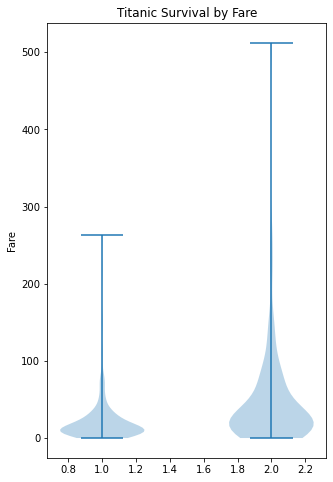

In [5]:
plt.figure(figsize = (5, 8))

dead_fare = titan.loc[titan.alive == "Dead"]["Fare"]
alive_fare = titan.loc[titan.alive == "Alive"]["Fare"]


viols = plt.violinplot([dead_fare, alive_fare]) 

plt.title('Titanic Survival by Fare')
plt.ylabel('Fare')

plt.show()

In [6]:
titan['cat_class'] = titan['Pclass'].map({1: 'First', 2: 'Second', 3: 'Third'})

In [7]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alive,cat_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead,Third
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alive,First
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alive,Third
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Alive,First
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead,Third


In [8]:
titan.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
alive            0
cat_class        0
dtype: int64

In [9]:
titan_2 = titan[['Age', 'cat_class']].dropna()

In [10]:
titan_2.isna().sum()

Age          0
cat_class    0
dtype: int64

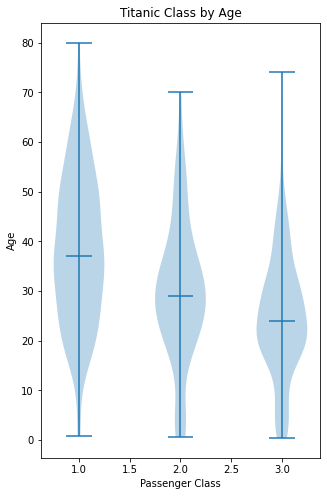

In [11]:
plt.figure(figsize = (5, 8))

pclass_1 = titan_2.loc[titan_2.cat_class == "First"]["Age"]
pclass_2 = titan_2.loc[titan_2.cat_class == "Second"]["Age"]
pclass_3 = titan_2.loc[titan_2.cat_class == "Third"]["Age"]


plt.violinplot([pclass_1, pclass_2, pclass_3], showmedians = True) 

plt.title('Titanic Class by Age')
plt.ylabel('Age')
plt.xlabel('Passenger Class')

plt.show()

## Violin plots using seaborn

<AxesSubplot:>

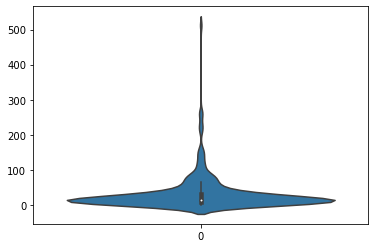

In [12]:
sns.violinplot(titan.Fare)

<AxesSubplot:xlabel='cat_class', ylabel='Age'>

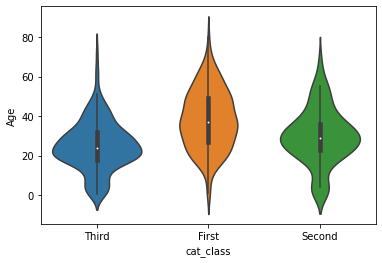

In [13]:
sns.violinplot(x=titan.cat_class, y=titan.Age)

<AxesSubplot:xlabel='cat_class', ylabel='Age'>

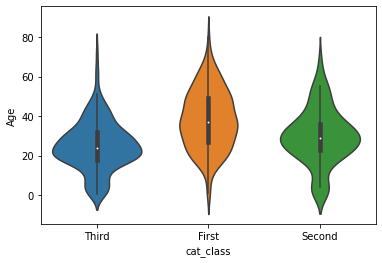

In [14]:
sns.violinplot(x="cat_class", y="Age", data = titan)

<AxesSubplot:xlabel='cat_class', ylabel='Age'>

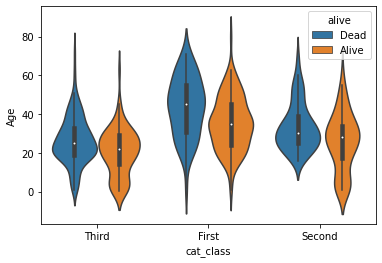

In [15]:
sns.violinplot(x="cat_class", y="Age", hue="alive", data = titan)

<AxesSubplot:xlabel='cat_class', ylabel='Age'>

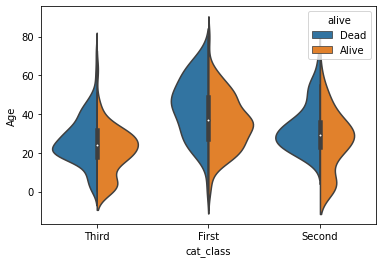

In [16]:
sns.violinplot(x="cat_class", y="Age", hue="alive", split = True, data = titan)

<AxesSubplot:xlabel='cat_class', ylabel='Age'>

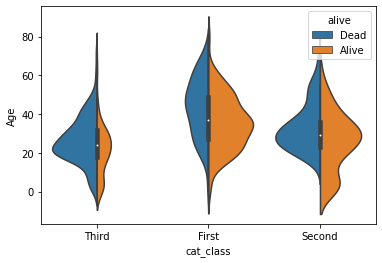

In [17]:
sns.violinplot(x="cat_class", y="Age", hue="alive", split = True, scale = 'count', data = titan)

<AxesSubplot:xlabel='cat_class', ylabel='Age'>

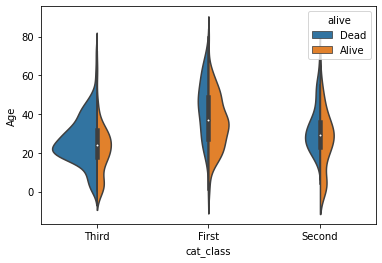

In [18]:
sns.violinplot(x="cat_class", y="Age", hue="alive", split = True, scale = 'count', scale_hue=False, data = titan)